In [52]:
import numpy as np
import pandas as pd
import seaborn as sea
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
import math

# Задание 1

Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [25]:
dfData = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
dfData.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [26]:
dfData['state']

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [27]:
dfData['state'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
250301    False
250302    False
250303    False
250304    False
250305    False
Name: state, Length: 250306, dtype: bool

In [28]:
dfData.state[dfData['state'].isna() == True]

183911    NaN
186126    NaN
188915    NaN
190375    NaN
191245    NaN
         ... 
249009    NaN
249505    NaN
249762    NaN
249874    NaN
250070    NaN
Name: state, Length: 93, dtype: object

In [29]:
dfData['state'].value_counts().head()

MI    228601
CA      5020
TX      2420
FL      2237
IL      1310
Name: state, dtype: int64

In [30]:
sMaxValueState = dfData['state'].value_counts()[:1].index[0]
sMaxValueState

'MI'

In [31]:
dfData.state[250070]

nan

In [32]:
result = dfData['state'].fillna(sMaxValueState)
result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [33]:
result[250070]

'MI'

# Задание 2

Найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. В качестве ответа укажите минимальное значение в получившемся нормализованном признаке.


In [34]:
dfData['balance_due']

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

In [35]:
aStd = StandardScaler().fit_transform(pd.DataFrame(dfData['balance_due']))
aStd

array([[ 0.13613444],
       [-0.24315767],
       [-0.36683987],
       ...,
       [-0.36683987],
       [-0.36683987],
       [-0.36683987]])

In [36]:
np.amin(aStd)

-13.147334652567258

# Задание 3

Найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака. Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [37]:
sSqrt = np.sqrt(dfData.balance_due[dfData['balance_due'] > 0])
sSqrt

0         17.464249
1          8.660254
5         17.464249
6         29.240383
7         11.832160
            ...    
250277    24.083189
250278    15.811388
250287    33.615473
250288    24.083189
250293    15.811388
Name: balance_due, Length: 137678, dtype: float64

In [45]:
print('Медианное значение: ', sSqrt.median())
print('Среднее значение: ', sSqrt.mean())
print('Модуль разницы этих значений: ', math.fabs(sSqrt.median() - sSqrt.mean()))

Медианное значение:  17.46424919657298
Среднее значение:  17.011653135663007
Модуль разницы этих значений:  0.45259606090997195


# Задание 4

Найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.


In [47]:
aPF = PolynomialFeatures(3).fit_transform(dfData[['balance_due', 'payment_amount']])
aPF

array([[1.00000e+00, 3.05000e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 7.50000e+01, 7.80000e+02, ..., 4.38750e+06,
        4.56300e+07, 4.74552e+08],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [40]:
print('Вычисление среднего значения\n',
      np.mean(aPF, axis = 1))

Вычисление среднего значения
 [2.84659560e+06 5.25664756e+07 1.00000000e-01 ... 1.00000000e-01
 1.00000000e-01 1.00000000e-01]


In [48]:
print('Максимальное значения\n',np.amax(np.mean(aPF, axis = 1)))

Максимальное значения
 135853371357.6


# Задание 5

Найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа. Выходными считаются дни под номерами 5 и 6.

In [42]:
dfData.ticket_issued_date[pd.to_datetime(dfData.ticket_issued_date).dt.weekday > 4]

5         2004-05-01 11:50:00
24        2004-11-13 15:30:00
25        2004-11-13 15:30:00
26        2005-01-01 11:00:00
2078      2005-02-05 13:25:00
                 ...         
250260    2011-12-24 11:30:00
250261    2011-12-24 11:30:00
250262    2011-12-24 11:30:00
250263    2011-12-24 11:30:00
250295    2011-12-31 16:15:00
Name: ticket_issued_date, Length: 1620, dtype: object

# Задание 6

Найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным выбросом.


/home/murph/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


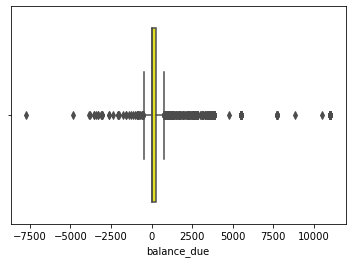

In [57]:
sea.boxplot(dfData['balance_due'], color='yellow');